In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("advertising.csv")
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [94]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [96]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [97]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [98]:
df.shape

(200, 4)

##  Exploratory Data Analysis

### . Visulazing Dependent and Independent Variables

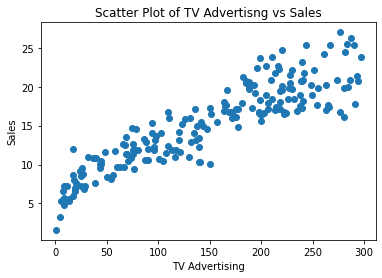

In [99]:
plt.scatter(df['TV'], df['Sales'],cmap='viridis')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV Advertisng vs Sales')
plt.show();

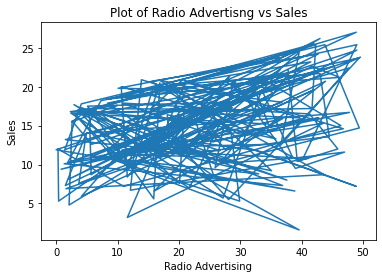

In [100]:
plt.plot(df['Radio'],df['Sales'])
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Plot of Radio Advertisng vs Sales')
plt.show();

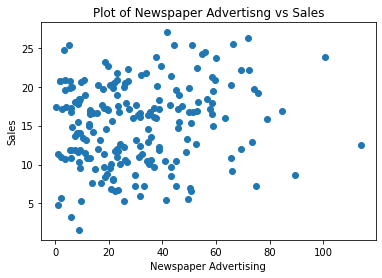

In [101]:
plt.scatter(x=df['Newspaper'],y=df['Sales'])
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.title('Plot of Newspaper Advertisng vs Sales')
plt.show();

#### Boxplot of Dependent vs Independent Variables

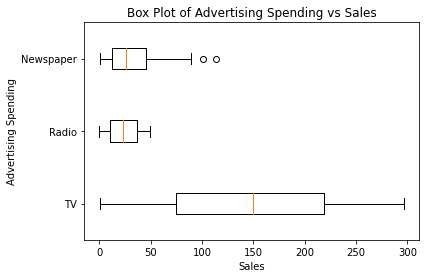

In [102]:
plt.boxplot(x=[df['TV'], df['Radio'], df['Newspaper']], labels=['TV', 'Radio', 'Newspaper'], vert=False)
plt.xlabel('Sales')
plt.ylabel('Advertising Spending')
plt.title('Box Plot of Advertising Spending vs Sales')
plt.show()


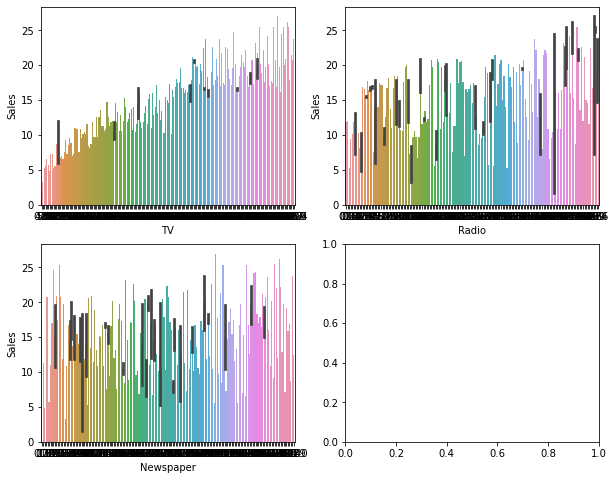

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Example with four independent variables (adjust as needed)
sns.barplot(x='TV', y='Sales', data=df, ax=axes[0, 0])
sns.barplot(x='Radio', y='Sales', data=df, ax=axes[0, 1])
sns.barplot(x='Newspaper', y='Sales', data=df, ax=axes[1, 0])
plt.show();

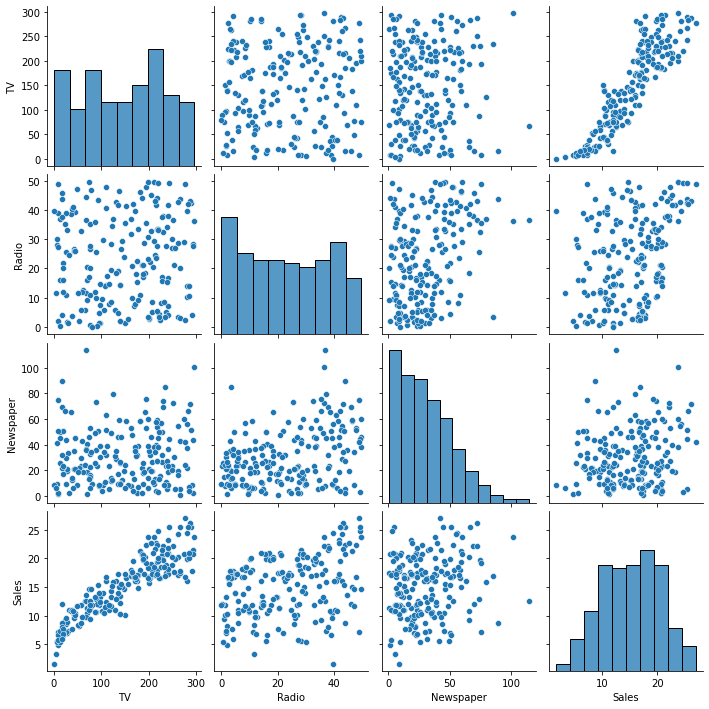

In [104]:
sns.pairplot(df)

#### Correlation Matrix 

In [105]:
correlation = df.corr()

<AxesSubplot:>

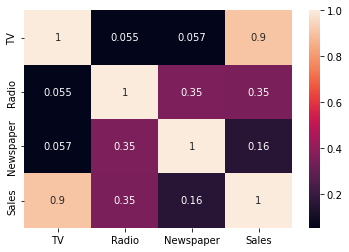

In [106]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

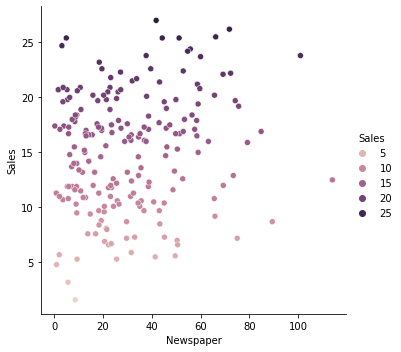

In [107]:
sns.relplot(x=df['Newspaper'],y=df['Sales'],hue='Sales',data=df)

C:\Users\HP\anaconda3\envs\py3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


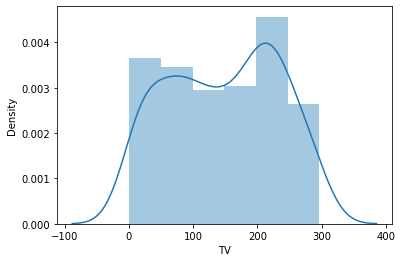

In [108]:
sns.distplot(df['TV']);

C:\Users\HP\anaconda3\envs\py3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


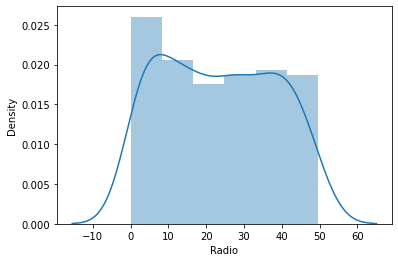

In [109]:
sns.distplot(df['Radio'],);

#### Kernel density plot of Newspaper

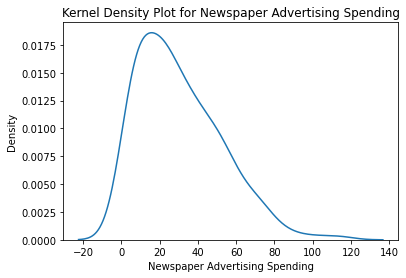

In [110]:
sns.kdeplot(df['Newspaper'])
plt.xlabel('Newspaper Advertising Spending')
plt.ylabel('Density')
plt.title('Kernel Density Plot for Newspaper Advertising Spending')
plt.show()

#### Kernel density plot of Radio

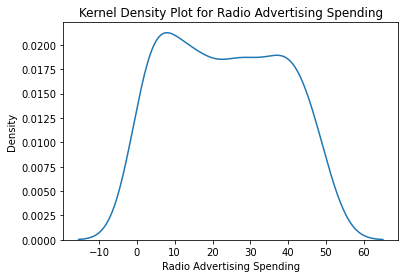

In [111]:
sns.kdeplot(df['Radio'])
plt.xlabel('Radio Advertising Spending')
plt.ylabel('Density')
plt.title('Kernel Density Plot for Radio Advertising Spending')
plt.show()

#### Kernel density plot of TV

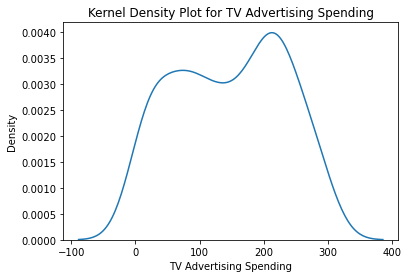

In [112]:
sns.kdeplot(df['TV'])
plt.xlabel('TV Advertising Spending')
plt.ylabel('Density')
plt.title('Kernel Density Plot for TV Advertising Spending')
plt.show()

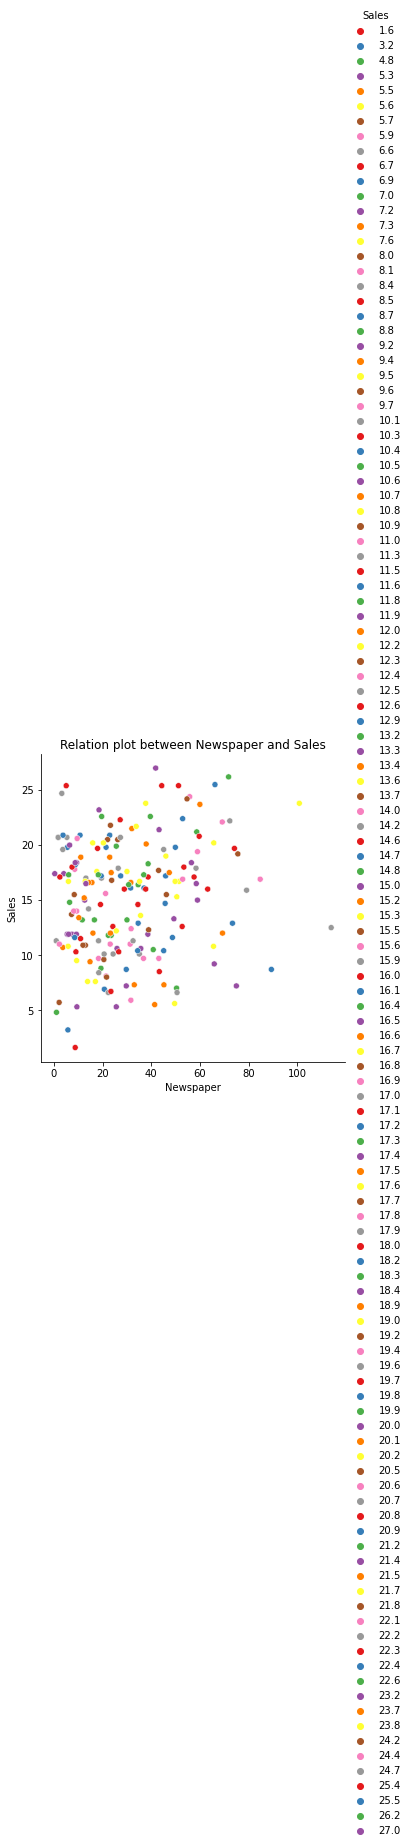

In [113]:
sns.relplot(x='Newspaper', y='Sales', hue='Sales', data=df, palette='Set1')

# Set plot labels and title
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Relation plot between Newspaper and Sales')

# Show the plot
plt.show()

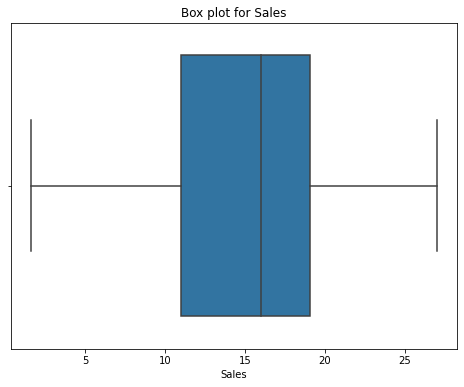

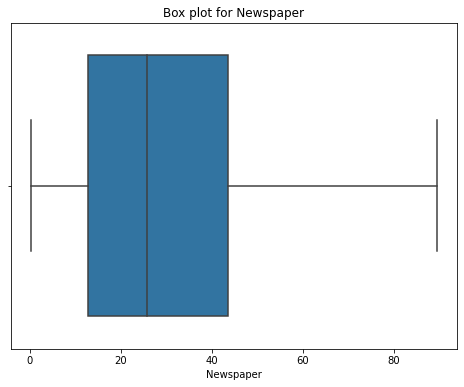

In [114]:
# Function to identify and handle outliers using IQR method
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Replace outliers with median (you can choose a different strategy)
    df.loc[outliers, column] = df[column].median()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

# Handle outliers for 'Sales'
handle_outliers('Sales')

# Handle outliers for 'Newspaper'
handle_outliers('Newspaper')

# Show the plot
plt.show()

### split the data

In [115]:
x = df.drop('Sales',axis=1)
y = df['Sales']

### Training and Testing data

In [116]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Train Model

### . Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

# predict 
y_pred_1 = lr.predict(x_test)

In [118]:
### Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)
r2_1 = r2_1*100

print(f'Mean Squared Error: {mse_1}')
print(f'R-squared: {r2_1}')

Mean Squared Error: 2.939747369372262
R-squared: 90.4865931330203


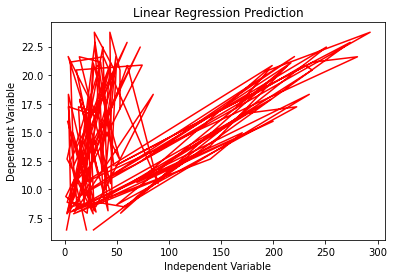

In [119]:
plt.plot(x_test.values, y_pred_1, color='red', label='Linear Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Prediction')
plt.show()

In [120]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso

# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5]
# }

param_grid1 = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

scorer1 = make_scorer(r2_score)

lasso = Lasso()

grid_search1 = GridSearchCV(estimator=lasso, param_grid=param_grid1, scoring=scorer1, cv=5)
grid_search1.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search1.best_params_)

print("R-squared on Test Set:", grid_search1.best_score_)

Best Hyperparameters: {'alpha': 0.1}
R-squared on Test Set: 0.8877840963430164


#### Decision Tree Regressor

In [121]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_pred2 = dt.predict(x_test)

In [122]:
### Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
r2_2 = r2_2*100

print(f'Mean Squared Error: {mse_2}')
print(f'R-squared: {r2_2}')

Mean Squared Error: 2.6967499999999998
R-squared: 91.27296439285332


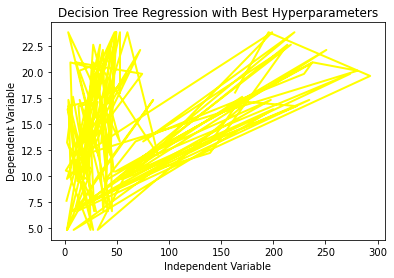

In [123]:

plt.plot(x_test.values, y_pred2, color="yellow", label="Decision Tree Regression", linewidth=2)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Decision Tree Regression with Best Hyperparameters")
plt.show()

In [124]:
# Define the hyperparameter grid
param_grid2 = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

scorer2 = make_scorer(r2_score)

grid_search2 = GridSearchCV(estimator=dt, param_grid=param_grid2, scoring=scorer, cv=5)
grid_search2.fit(x_train,y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search2.best_params_)

print("R-squared on Test Set:", grid_search2.best_score_)

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
R-squared on Test Set: 0.9023365686291174


#### RandomForest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_pred3 = rf.predict(x_test)


In [126]:
### Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
r2_3 = r2_3*100

print(f'Mean Squared Error: {mse_3}')
print(f'R-squared: {r2_3}')

Mean Squared Error: 1.5489960250000023
R-squared: 94.98724632780062


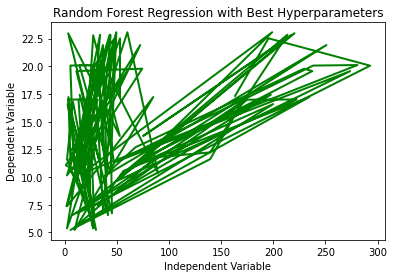

In [127]:
plt.plot(x_test.values, y_pred3, color="green", label="Random Forest Regression", linewidth=2)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Random Forest Regression with Best Hyperparameters")
plt.show()

In [130]:
param_grid3 = {'n_estimators': [50, 100, 150],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

scorer3 = make_scorer(r2_score)
grid_search3 = GridSearchCV(estimator=rf, param_grid=param_grid3, scoring=scorer3, cv=5)
grid_search3.fit(x_train,y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search3.best_params_)

print("R-squared on Test Set:", grid_search3.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R-squared on Test Set: 0.9339125346229039


#### GradientBoosting Regressor

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

#predict
y_pred4 = gb.predict(x_test)

In [132]:
### Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse_4 = mean_squared_error(y_test, y_pred4)
r2_4 = r2_score(y_test, y_pred4)
r2_4 = r2_4*100

print(f'Mean Squared Error: {mse_4}')
print(f'R-squared: {r2_4}')

Mean Squared Error: 1.1981403685324983
R-squared: 96.12266110742821


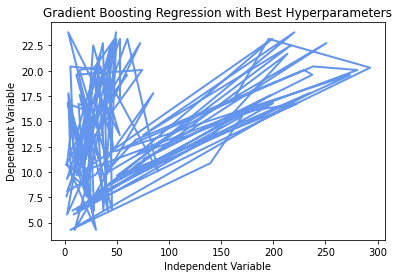

In [134]:
plt.plot(x_test.values, y_pred4, color="cornflowerblue", label="Gradient Boosting Regression", linewidth=2)
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Gradient Boosting Regression with Best Hyperparameters")
plt.show()

In [136]:
param_grid4 = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

scorer4 = make_scorer(r2_score)

grid_search4 = GridSearchCV(estimator=gb, param_grid=param_grid4, scoring=scorer4, cv=5)
grid_search4.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search4.best_params_)

print("R-squared on Test Set:", grid_search4.best_score_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
R-squared on Test Set: 0.9300749014912967


In [137]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

In [140]:
before_cv_scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    before_cv_scores[name] = r2

In [142]:
after_cv_scores = {}
for name, model in models.items():
    if name == 'Linear Regression':
        # Linear Regression does not have hyperparameters, so skip GridSearchCV
        after_cv_scores[name] = before_cv_scores[name]
        continue
    param_grid = {}       
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    cv_scores = cross_val_score(best_model, x_train, y_train, scoring='r2', cv=5)
    
    mean_cv_score = np.mean(cv_scores)
    
    after_cv_scores[name] = mean_cv_score
    
result_df = pd.DataFrame({
'Before CV': before_cv_scores,
'After CV': after_cv_scores
})

result_df

,Before CV,After CV
Linear Regression,0.904866,0.904866
Decision Tree Regressor,0.912689,0.876522
Random Forest Regressor,0.952322,0.930152
Gradient Boosting Regressor,0.960009,0.922786


### Before CV:
The Gradient Boosting Regressor had the highest R-squared score (0.960009)

### After CV:
The Linear Regression model maintained its R-squared score, but the Decision Tree Regressor,Random Forest Regressor and Gradient Boosting Regressor scores decreased Sligthly.

##### . It's essential to consider the results of cross-validation as it provides a more robust evaluation of the model's performance. In this case, the Random Forest Regressor has the highest R-squared score after cross-validation, indicating better generalization performance.